# Ted Talk Analysis:Logistic Regression

Problem Statement
Understanding the problem statement is the first and foremost step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement -

The objective of this task is to detect if the ted talk is popular. For the sake of simplicity, we say how emotion  can affect the popularity of Ted Talk. So, the task is to find the relationship between the emotion and the popularity. And I did a contrast. Because I thought the number of comments is also a display for the people emotion. The more emotion shows that people have more strong emotion for the Ted Talk. The first LR is with comments and the second one is without comments

Formally, given a training sample of tweets and labels, the higher of views( times that the video had been watched) shows that the video is more popular. I used the mean value of views to decide whether the ted talk is popular. If the views is higher than the mean value represent that the ted talk is popular, and the value will return to 1, otherwise, return to 0 your objective is to predict the labels on the test dataset.

Thanks to my teammates, they have already did the Text PreProcessing and Cleaning. I just use a few column from the dataset and build the model



# M1:  Date with comments

## Loading Libraries and Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Use the mean value to distinguish the data

In [47]:
df = pd.read_csv('LRdata.csv',encoding = 'GBK')
df['views'] = np.where(df['views']>=1.741049e+06,1,0)
df


,views,comments,AFRAID,AMUSED,ANGRY,ANNOYED,DONT_CARE,HAPPY,INSPIRED,SAD
0,1,4553,0.092794,0.114177,0.116472,0.132365,0.129963,0.105839,0.201247,0.107143
1,1,265,0.108238,0.111975,0.121799,0.134885,0.129981,0.107100,0.178588,0.107434
2,0,124,0.093672,0.123894,0.115410,0.138560,0.138518,0.108802,0.179580,0.101564
3,0,200,0.105926,0.106197,0.128772,0.134356,0.121305,0.108597,0.182394,0.112452
4,1,593,0.108617,0.112215,0.118959,0.129735,0.126809,0.107173,0.184243,0.112248
...,...,...,...,...,...,...,...,...,...,...
2457,0,17,0.102343,0.108939,0.131899,0.138636,0.126494,0.101510,0.174694,0.115485
2458,0,6,0.120188,0.119194,0.114707,0.126044,0.117753,0.104346,0.175029,0.122739
2459,0,10,0.097120,0.131195,0.119608,0.129501,0.123598,0.106018,0.193803,0.099157
2460,0,32,0.094750,0.117907,0.122510,0.136626,0.131677,0.101304,0.191245,0.103982


To make sure there are no null value in the data

In [48]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2462 entries, 0 to 2461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   views      2462 non-null   int64  
 1   comments   2462 non-null   int64  
 2   AFRAID     2462 non-null   float64
 3   AMUSED     2462 non-null   float64
 4   ANGRY      2462 non-null   float64
 5   ANNOYED    2462 non-null   float64
 6   DONT_CARE  2462 non-null   float64
 7   HAPPY      2462 non-null   float64
 8   INSPIRED   2462 non-null   float64
 9   SAD        2462 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 192.5 KB


(2462, 10)

In [97]:
print(df.mean())

#caculate the mean value, 

views        0.248578
AFRAID       0.101758
AMUSED       0.117387
ANGRY        0.118941
ANNOYED      0.132210
DONT_CARE    0.128136
HAPPY        0.105526
INSPIRED     0.187950
SAD          0.108092
dtype: float64


Caculate the sum of 1 in the views

In [51]:
y = df.iloc[:,0]
x = df.iloc[:,1:]
y.sum()


612

## Building the HEATMAP

Use the pearson method to caculate the correlation for the emotions and the comments 

In [50]:
corr = df.corr(method = 'pearson')
corr

,views,comments,AFRAID,AMUSED,ANGRY,ANNOYED,DONT_CARE,HAPPY,INSPIRED,SAD
views,1.000000,0.373941,-0.197620,0.097028,-0.094601,0.090237,0.142386,-0.004543,0.167730,-0.116249
comments,0.373941,1.000000,-0.044133,-0.021861,0.041938,0.117957,-0.007889,-0.096562,0.050159,-0.038030
AFRAID,-0.197620,-0.044133,1.000000,-0.302458,0.323362,-0.316697,-0.732029,-0.425134,-0.661385,0.504230
AMUSED,0.097028,-0.021861,-0.302458,1.000000,-0.670233,-0.285749,0.358256,0.343798,0.257202,-0.578278
ANGRY,-0.094601,0.041938,0.323362,-0.670233,1.000000,0.473054,-0.535055,-0.555171,-0.591665,0.426177
ANNOYED,0.090237,0.117957,-0.316697,-0.285749,0.473054,1.000000,0.047510,-0.139958,-0.079309,-0.302981
DONT_CARE,0.142386,-0.007889,-0.732029,0.358256,-0.535055,0.047510,1.000000,0.463702,0.394805,-0.485816
HAPPY,-0.004543,-0.096562,-0.425134,0.343798,-0.555171,-0.139958,0.463702,1.000000,0.312888,-0.497812
INSPIRED,0.167730,0.050159,-0.661385,0.257202,-0.591665,-0.079309,0.394805,0.312888,1.000000,-0.450095
SAD,-0.116249,-0.038030,0.504230,-0.578278,0.426177,-0.302981,-0.485816,-0.497812,-0.450095,1.000000


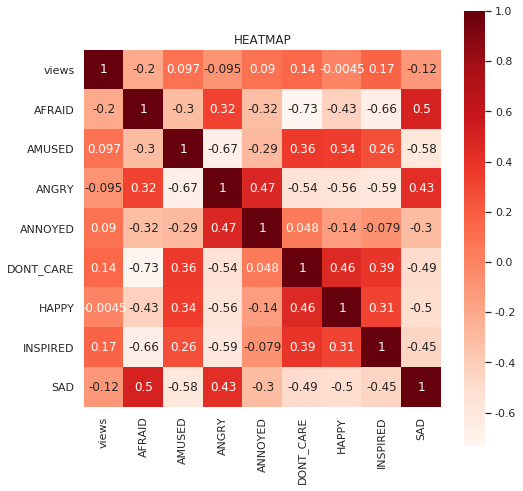

In [100]:
plt.subplots(figsize=(8,8)) 
plt.rcParams['axes.unicode_minus'] = False 
sns.heatmap(corr,annot=True,vmax=1,square=True,cmap="Reds")
plt.title('HEATMAP')
plt.show()

## Building the LR model

Split the data into the training and testing

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
from sklearn.preprocessing import StandardScaler


In [54]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

Caculate the LR score 

In [55]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(class_weight='balanced') 
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))

0.771329077190946


Caculate the coef_ and intecept_ (the parameter of the LR function)

In [56]:
coef = lr.coef_
intercept = lr.intercept_
print('coef is:',coef)
print('intercept is:',intercept)

coef is: [[ 1.96562037 -0.40033744  0.26311066 -0.11144416  0.12436748  0.14642129
  -0.19044807  0.16246274  0.17168365]]
intercept is: [-0.16740411]


Use the test to verify the model and get the score

In [57]:
y_pred = lr.predict(x_test)
print(lr.score(x_test,y_test))

0.774018944519621


Show the socres of the model. While the precision for 0 is much higher, the precision for the value 1 is so much lower. I will use sevearal methods to increase the accuracy for value 1

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       558
           1       0.53      0.72      0.61       181

    accuracy                           0.77       739
   macro avg       0.71      0.76      0.73       739
weighted avg       0.81      0.77      0.78       739



## Showing the AUC

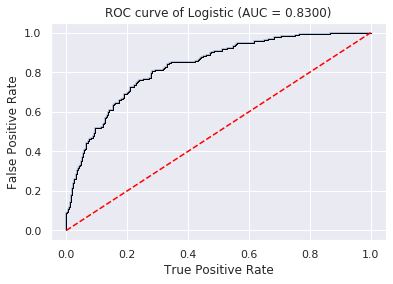

In [59]:
from sklearn import metrics
y_score = lr.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)
roc_auc = metrics.auc(fpr,tpr)

plt.plot(fpr,tpr,alpha = 0.5)
# plt.stackplot(fpr,tpr,color = '',alpha = 0.5,edgecolor = 'black')
plt.plot(fpr,tpr,color='black',lw = 1)

plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

# plt.text(0.5,0.3,'ROC curve (area = %0.2f)'%roc_auc)
plt.title("ROC curve of %s (AUC = %.4f)" % ('Logistic',roc_auc))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

plt.show()

As we can see in the AUC, the LR model did quite great jobs. However, the accuracy of the 1 value still bothers me

## Down sampling algorithm

In [60]:
from imblearn.under_sampling import RandomUnderSampler  
df.groupby('views').count()

,comments,AFRAID,AMUSED,ANGRY,ANNOYED,DONT_CARE,HAPPY,INSPIRED,SAD
views,,,,,,,,,
0,1850,1850,1850,1850,1850,1850,1850,1850,1850
1,612,612,612,612,612,612,612,612,612


I chose random date from 0 value and made the sum equal to 1 value and get the new dataset. In the new dataset the sum of 1 and 0 are both 612

In [61]:
model_RandomUnderSampler = RandomUnderSampler() 
x_rus,y_rus = model_RandomUnderSampler.fit_sample(x,y)
RandomUnderSampler_resampled = pd.concat([x_rus, y_rus],axis=1)
groupby_data_RandomUnderSampler = RandomUnderSampler_resampled.groupby('views').count()
print(groupby_data_RandomUnderSampler)

       comments  AFRAID  AMUSED  ANGRY  ANNOYED  DONT_CARE  HAPPY  INSPIRED  \
views                                                                         
0           612     612     612    612      612        612    612       612   
1           612     612     612    612      612        612    612       612   

       SAD  
views       
0      612  
1      612  


## Building the LR model based on the new dateset

In [63]:
rus_df = RandomUnderSampler_resampled
y = rus_df.iloc[:,9]
x = rus_df.iloc[:,:9]

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

Caculate the score

In [67]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR() 
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))

0.7429906542056075


In [68]:
coef = lr.coef_
intercept = lr.intercept_
print('coef is:',coef)
print('intercept is:',intercept)

coef is: [[ 2.52474168 -0.34723497  0.23255402 -0.14622537  0.26832697  0.14428041
  -0.17137811  0.21908184 -0.03935611]]
intercept is: [0.25560812]


In [69]:
y_pred = lr.predict(x_test)
print(lr.score(x_test,y_test))

0.720108695652174


Get the score from the score

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       173
           1       0.77      0.68      0.72       195

    accuracy                           0.72       368
   macro avg       0.72      0.72      0.72       368
weighted avg       0.73      0.72      0.72       368



## Showing the new AUC

Text(0, 0.5, 'False Positive Rate')

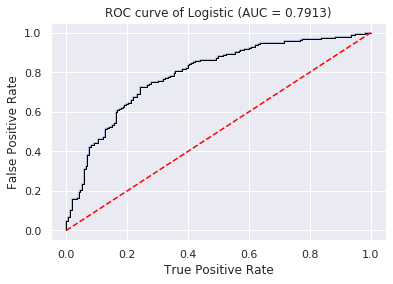

In [71]:
y_score = lr.predict_proba(x_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)
roc_auc = metrics.auc(fpr,tpr)

plt.plot(fpr,tpr,alpha = 0.5)
# plt.stackplot(fpr,tpr,color = '',alpha = 0.5,edgecolor = 'black')
plt.plot(fpr,tpr,color='black',lw = 1)

plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

# plt.text(0.5,0.3,'ROC curve (area = %0.2f)'%roc_auc)
plt.title("ROC curve of %s (AUC = %.4f)" % ('Logistic',roc_auc))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

## K-fold verification

In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=8,scoring='accuracy').mean()

0.7271241830065359

## Conclusion 

After down sampling the AUC score get a little wave, the precision for both 0 and 1 are more accurately and more balance. LR model need the sample to be balace. It will improve the accuracy. So I think the model after down sampling is more comprehensive

# M2: Data without comments

The code are quite similar from the above. So I just show the codes here and I will analyse the conclusion at the bottom 

## Droping the comments

In [ ]:
df = df.drop(['comments'],axis=1)
df

In [75]:
y = df.iloc[:,0]
x = df.iloc[:,1:]
y.sum()

612

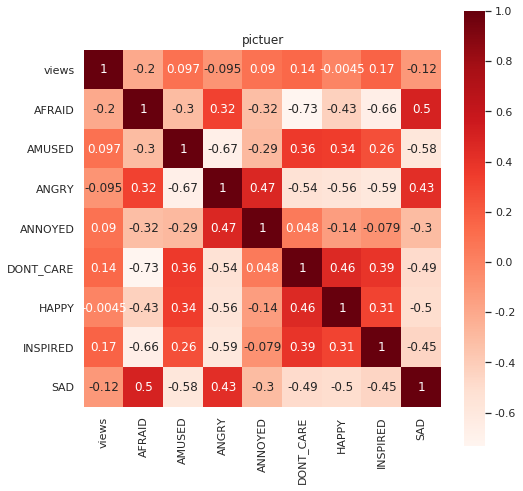

In [77]:
corr = df.corr(method = 'pearson')
corr
plt.subplots(figsize=(8,8)) 
plt.rcParams['axes.unicode_minus'] = False 
sns.heatmap(corr,annot=True,vmax=1,square=True,cmap="Reds")
plt.title('pictuer')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [80]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(class_weight='balanced') 
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))

0.6105629715612304


In [81]:
coef = lr.coef_
intercept = lr.intercept_
print('coef is:',coef)
print('intercept is:',intercept)

coef is: [[-0.36917031  0.23705237 -0.13124196  0.23782904  0.11474558 -0.34274838
   0.21328207  0.15361417]]
intercept is: [-0.11194321]


In [82]:
y_pred = lr.predict(x_test)
print(lr.score(x_test,y_test))

0.5953991880920162


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.59      0.69       558
           1       0.32      0.60      0.42       181

    accuracy                           0.60       739
   macro avg       0.57      0.60      0.56       739
weighted avg       0.70      0.60      0.62       739



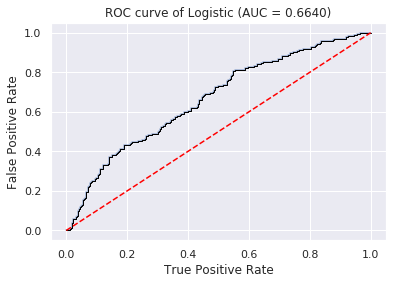

In [84]:
from sklearn import metrics
y_score = lr.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)
roc_auc = metrics.auc(fpr,tpr)

plt.plot(fpr,tpr,alpha = 0.5)
# plt.stackplot(fpr,tpr,color = '',alpha = 0.5,edgecolor = 'black')
plt.plot(fpr,tpr,color='black',lw = 1)

plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

# plt.text(0.5,0.3,'ROC curve (area = %0.2f)'%roc_auc)
plt.title("ROC curve of %s (AUC = %.4f)" % ('Logistic',roc_auc))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

plt.show()

In [85]:
from imblearn.under_sampling import RandomUnderSampler  # 欠抽样处理库RandomUnderSampler
df.groupby('views').count()

,AFRAID,AMUSED,ANGRY,ANNOYED,DONT_CARE,HAPPY,INSPIRED,SAD
views,,,,,,,,
0,1850,1850,1850,1850,1850,1850,1850,1850
1,612,612,612,612,612,612,612,612


In [86]:
model_RandomUnderSampler = RandomUnderSampler() #创建RandomUnderSampler模型对象
x_rus,y_rus = model_RandomUnderSampler.fit_sample(x,y)
RandomUnderSampler_resampled = pd.concat([x_rus, y_rus],axis=1)
groupby_data_RandomUnderSampler = RandomUnderSampler_resampled.groupby('views').count()
print(groupby_data_RandomUnderSampler)

       AFRAID  AMUSED  ANGRY  ANNOYED  DONT_CARE  HAPPY  INSPIRED  SAD
views                                                                 
0         612     612    612      612        612    612       612  612
1         612     612    612      612        612    612       612  612


In [88]:
rus_df = RandomUnderSampler_resampled
y = rus_df.iloc[:,8]
x = rus_df.iloc[:,:8]

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [90]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR() #无设置分类权重
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))

0.6191588785046729


In [91]:
coef = lr.coef_
intercept = lr.intercept_
print('coef is:',coef)
print('intercept is:',intercept)

coef is: [[-0.33362177  0.19877696 -0.30195182  0.38825974  0.01519347 -0.24314477
   0.24508615  0.16546308]]
intercept is: [-0.07282315]


In [92]:
y_pred = lr.predict(x_test)
print(lr.score(x_test,y_test))

0.6195652173913043


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62       173
           1       0.66      0.59      0.62       195

    accuracy                           0.62       368
   macro avg       0.62      0.62      0.62       368
weighted avg       0.62      0.62      0.62       368



Text(0, 0.5, 'False Positive Rate')

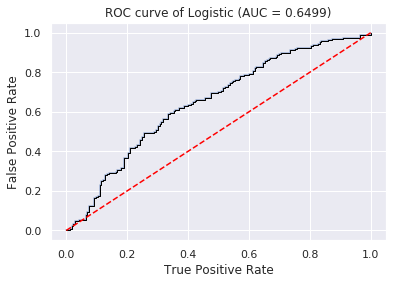

In [106]:
y_score = lr.predict_proba(x_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)
roc_auc = metrics.auc(fpr,tpr)

plt.plot(fpr,tpr,alpha = 0.5)
# plt.stackplot(fpr,tpr,color = '',alpha = 0.5,edgecolor = 'black')
plt.plot(fpr,tpr,color='black',lw = 1)

plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

# plt.text(0.5,0.3,'ROC curve (area = %0.2f)'%roc_auc)
plt.title("ROC curve of %s (AUC = %.4f)" % ('Logistic',roc_auc))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

In [95]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=8,scoring='accuracy').mean()

0.6053921568627452

# Conclusion for M1 and M2

From the both models above we can see that positive emotion like happy, inspired really help the popularity of Ted talk, and the negative emotion like sad and afraid are negative  relate to the popularity. With the comments, the model will be more accurate. So I believe with the comments number will better to predict the popularity of the ted talks